In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [4]:
df=pd.read_csv("data.xlsx - Sheet1.csv")

In [5]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.shape

(3998, 39)

In [7]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll


Observations

1. DOJ and DOB columns needs to be converted from object to data time datatype.
2. The "Unnamed:0" columns appears to be irrelevant for this explorartory data analysis and hence would need to be dropped.
3. There are no null values in any columns .

In [11]:
df=df.drop("Unnamed: 0",axis=1)

In [12]:
df.columns=df.columns.str.lower()
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [13]:
#Convert DOJ into datetime 
df["doj"]=pd.to_datetime(df["doj"])


In [14]:
df["collegetier"]=df["collegetier"].astype(object)
df["collegestate"]=df["collegestate"].astype(object)


In [15]:
cat_df=df.select_dtypes(include=["object"])
num_df=df.select_dtypes(include=["int64","float64"])

In [16]:
cat_df.columns

Index(['dol', 'designation', 'jobcity', 'gender', 'dob', '10board', '12board',
       'collegetier', 'degree', 'specialization', 'collegestate'],
      dtype='object')

In [17]:
num_df.columns

Index(['id', 'salary', '10percentage', '12graduation', '12percentage',
       'collegeid', 'collegegpa', 'collegecityid', 'collegecitytier',
       'graduationyear', 'english', 'logical', 'quant', 'domain',
       'computerprogramming', 'electronicsandsemicon', 'computerscience',
       'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [18]:
columns_to_check=["domain","computerprogramming","electronicsandsemicon","electricalengg","telecomengg","civilengg","conscientiousness","agreeableness","extraversion","nueroticism","openess_to_experience"]
negative_counts=df[columns_to_check].lt(0).sum()

for index,(column,count) in enumerate(negative_counts.items(),1):
    print(f"{index}.Number of negative values in '{column}':{count}")

1.Number of negative values in 'domain':246
2.Number of negative values in 'computerprogramming':868
3.Number of negative values in 'electronicsandsemicon':2854
4.Number of negative values in 'electricalengg':3837
5.Number of negative values in 'telecomengg':3624
6.Number of negative values in 'civilengg':3956
7.Number of negative values in 'conscientiousness':1961
8.Number of negative values in 'agreeableness':1461
9.Number of negative values in 'extraversion':1827
10.Number of negative values in 'nueroticism':2270
11.Number of negative values in 'openess_to_experience':2026


In [19]:
#Replace -ve values with 0
for col in columns_to_check:
    df.loc[df[col]<0,col]=0

negative_counts={col:(df[col]<0).sum() for col in columns_to_check}

for col,count in negative_counts.items():
    print("num of -ve values in '{}' : {}" .format(col, count))

num of -ve values in 'domain' : 0
num of -ve values in 'computerprogramming' : 0
num of -ve values in 'electronicsandsemicon' : 0
num of -ve values in 'electricalengg' : 0
num of -ve values in 'telecomengg' : 0
num of -ve values in 'civilengg' : 0
num of -ve values in 'conscientiousness' : 0
num of -ve values in 'agreeableness' : 0
num of -ve values in 'extraversion' : 0
num of -ve values in 'nueroticism' : 0
num of -ve values in 'openess_to_experience' : 0


In [20]:
unique_designation=df["designation"].unique
unique_designation

<bound method Series.unique of 0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: designation, Length: 3998, dtype: object>

In [21]:
unique_gender=df["gender"].unique
unique_gender

<bound method Series.unique of 0       f
1       m
2       f
3       m
4       m
       ..
3993    m
3994    f
3995    m
3996    f
3997    f
Name: gender, Length: 3998, dtype: object>

In [22]:
unique_cities=df["jobcity"].unique()
unique_cities

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [23]:
df.jobcity=df.jobcity.str.strip().str.lower()
unique_cities_cleaned = df["jobcity"].unique()
unique_cities_cleaned

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', '-1',
       'mohali', 'jhansi', 'delhi', 'bhubaneswar', 'navi mumbai',
       'mumbai', 'new delhi', 'mangalore', 'rewari', 'gaziabaad',
       'bhiwadi', 'mysore', 'rajkot', 'greater noida', 'jaipur', 'thane',
       'maharajganj', 'thiruvananthapuram', 'punchkula', 'bhubaneshwar',
       'coimbatore', 'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar',
       'una', 'daman and diu', 'gurgoan', 'vsakhapttnam', 'nagpur',
       'bhagalpur', 'new delhi - jaisalmer', 'ahmedabad', 'kochi/cochin',
       'bankura', 'bengaluru', 'kanpur', 'vijayawada', 'kochi', 'beawar',
       'alwar', 'siliguri', 'raipur', 'bhopal', 'faridabad', 'jodhpur',
       'udaipur', 'muzaffarpur', 'kolkata`', 'bulandshahar', 'haridwar',
       'raigarh', 'visakhapatnam', 'jabalpur', 'unnao', 'aurangabad',
       'belgaum', 'dehradun', 'rudrapur', 'jamshedpur', 'vizag', 'nouda',
       'dharam

In [24]:
city_mapping={
'bangalore': 'Bangalore',
'banglore': 'Bangalore',
'banagalore': 'Bangalore',
'bengaluru': 'Bangalore',
'asifabadbanglore':'Bangalore',
'indore': 'Indore',
'chennai': 'Chennai',
'gurgaon': 'Gurgaon',
'gurgoan': 'Gurgaon',
'gurga': 'Gurgaon',
'manesar': 'Manesar',
'hyderabad': 'Hyderabad',
'hderabad': 'Hyderabad',
'hyderabad(bhadurpally)': 'Hyderabad',
'noida': 'Noida',
'nouda': 'Noida',
'kolkata': 'Kolkata',
'kolkata`': 'Kolkata',
'pune': 'Pune',
'-1': 'Unknown',
'mohali': 'Mohali',
'jhansi': 'Jhansi',
'delhi': 'Delhi',
'new delhi': 'New Delhi',
'bhubaneswar': 'Bhubaneswar',
'bhubaneshwar': 'Bhubaneswar',
'navi mumbai': 'Navi Mumbai',
'mumbai': 'Mumbai',
'mangalore': 'Mangalore',
'rewari': 'Rewari',
'gaziabaad': 'Ghaziabad',
'ghaziabad': 'Ghaziabad',
'bhiwadi': 'Bhiwadi',
'mysore': 'Mysore',
'rajkot': 'Rajkot',
'greater noida': 'Greater Noida',
'jaipur': 'Jaipur',
'thane': 'Thane',
'maharajganj': 'Maharajganj',
'thiruvananthapuram': 'Thiruvananthapuram',
'punchkula': 'Panchkula',
'coimbatore': 'Coimbatore',
'dhanbad': 'Dhanbad',
'lucknow': 'Lucknow',
'trivandrum': 'Thiruvananthapuram',
'gandhi nagar': 'Gandhinagar',
'una': 'Una',
'daman and diu': 'Daman and Diu',
'vsakhapttnam': 'Visakhapatnam',
'nagpur': 'Nagpur',
'bhagalpur': 'Bhagalpur',
'new delhi - jaisalmer': 'New Delhi',
'ahmedabad': 'Ahmedabad',
'kochi/cochin': 'Kochi',
'bankura': 'Bankura',
'kanpur': 'Kanpur',
'vijayawada': 'Vijayawada',
'kochi': 'Kochi',
'beawar': 'Beawar',
'alwar': 'Alwar',
'siliguri': 'Siliguri',
'raipur': 'Raipur',
'bhopal': 'Bhopal',
'faridabad': 'Faridabad',
'jodhpur': 'Jodhpur',
'udaipur': 'Udaipur',
'muzaffarpur': 'Muzaffarpur',
'bulandshahar': 'Bulandshahar',
'haridwar': 'Haridwar',
'raigarh': 'Raigarh',
'visakhapatnam': 'Visakhapatnam',
'jabalpur': 'Jabalpur',
'unnao': 'Unnao',
'aurangabad': 'Aurangabad',
'belgaum': 'Belgaum',
'dehradun': 'Dehradun',
'rudrapur': 'Rudrapur',
'jamshedpur': 'Jamshedpur',
'vizag': 'Visakhapatnam',
'nouda': 'Noida',
'dharamshala': 'Dharamshala',
'hissar': 'Hisar',
'ranchi': 'Ranchi',
'madurai': 'Madurai',
'chandigarh': 'Chandigarh',
'australia': 'Australia',
'cheyyar': 'Cheyyar',
'sonepat': 'Sonepat',
'pantnagar': 'Pantnagar',
'jagdalpur': 'Jagdalpur',
'angul': 'Angul',
'baroda': 'Vadodara',
'ariyalur': 'Ariyalur',
'jowai': 'Jowai',
'neemrana': 'Neemrana',
'tirupathi': 'Tirupati',
'bhubneshwar': 'Bhubaneswar',
 'calicut': 'Kozhikode',
'gandhinagar': 'Gandhinagar',
'dubai': 'Dubai',
'ahmednagar': 'Ahmednagar',
'nashik': 'Nashik',
'bellary': 'Bellary',
'ludhiana': 'Ludhiana',
'muzaffarnagar': 'Muzaffarnagar',
'gagret': 'Gagret',
'indirapuram, ghaziabad': 'Ghaziabad',
'gwalior': 'Gwalior',
'chennai & mumbai': 'Chennai',
'rajasthan': 'Rajasthan',
'sonipat': 'Sonipat',
'bareli': 'Bareli',
'hospete': 'Hospete',
'miryalaguda': 'Miryalaguda',
'dharuhera': 'Dharuhera',
'meerut': 'Meerut',
'ganjam': 'Ganjam',
'hubli': 'Hubli',
'ncr': 'NCR',
'agra': 'Agra',
'trichy': 'Tiruchirappalli',
'kudankulam ,tarapur': 'Kudankulam',
'ongole': 'Ongole',
'sambalpur': 'Sambalpur',
'pondicherry': 'Puducherry',
'bundi': 'Bundi',
'sadulpur,rajgarh,distt-churu,rajasthan': 'Rajasthan',
'am': 'Am',
'bikaner': 'Bikaner',
'vadodara': 'Vadodara',
'india': 'India',
'asansol': 'Asansol',
'tirunelvelli': 'Tirunelveli',
'ernakulam': 'Ernakulam',
'bilaspur': 'Bilaspur',
'chandrapur': 'Chandrapur',
'nanded': 'Nanded',
'dharmapuri': 'Dharmapuri',
'vandavasi': 'Vandavasi',
'rohtak': 'Rohtak',
'patna': 'Patna',
'salem': 'Salem',
'nasikcity': 'Nashik',
'technopark, trivandrum': 'Trivandrum',
'bharuch': 'Bharuch',
'tornagallu': 'Tornagallu',
'jaspur': 'Jaspur',
'burdwan': 'Burdwan',
'shimla': 'Shimla',
'gajiabaad': 'Ghaziabad',
'jammu': 'Jammu',
'shahdol': 'Shahdol',
'muvattupuzha': 'Muvattupuzha',
'al jubail,saudi arabia': 'Al Jubail',
'kalmar, sweden': 'Kalmar',
'secunderabad': 'Secunderabad',
'a-64,sec-64,noida': 'Noida',
'ratnagiri': 'Ratnagiri',
'jhajjar': 'Jhajjar',
'gulbarga': 'Gulbarga',
'hyderabad(bhadurpally)': 'Hyderabad',
'nalagarh': 'Nalagarh',
'jeddah saudi arabia': 'Jeddah',
'chennai, bangalore': 'Chennai',
'jamnagar': 'Jamnagar',
'tirupati': 'Tirupati',
'gonda': 'Gonda',
'orissa': 'Odisha',
'kharagpur': 'Kharagpur',
'navi mumbai , hyderabad': 'Navi Mumbai',
'joshimath': 'Joshimath',
'bathinda': 'Bathinda',
'johannesburg': 'Johannesburg',
'kala amb': 'Kala Amb',
'karnal': 'Karnal',
'london': 'London',
'kota': 'Kota',
'dehraj': 'Dehradun',
'melbourne': 'Melbourne',
'moradabad': 'Moradabad',
'delhi-gurgaon': 'Delhi',
'ambala': 'Ambala',
'faridkot': 'Faridkot',
'rohtak, haryana': 'Rohtak',
'khammam': 'Khammam',
'khurda': 'Khurda',
'jhalawar': 'Jhalawar',
'kaithal': 'Kaithal',
'sonbhadra': 'Sonbhadra',
'fatehgarh sahib': 'Fatehgarh Sahib',
'kaithal-haryana': 'Kaithal',
'bhilwara': 'Bhilwara',
'coimbatore, tirupur': 'Coimbatore',
'sri ganganagar': 'Sri Ganganagar',
'manipal': 'Manipal',
'tirupathi': 'Tirupati',
'kharagpur, west bengal': 'Kharagpur',
'kolkata': 'Kolkata',
'trichy-tiruchirappalli': 'Tiruchirappalli',
}

In [25]:
df['jobcity'] = df['jobcity'].replace(city_mapping)

In [26]:
df['jobcity'] = df.jobcity.str.strip().str.lower()

In [27]:
df

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",...,-1,-1,0,0,0,0.9737,0.8128,0.5269,1.35490,0.0000
1,579905,500000.0,2013-09-01,present,assistant manager,indore,m,10/4/89 0:00,85.40,cbse,...,-1,-1,0,0,0,0.0000,0.3789,1.2396,0.00000,0.8637
2,810601,325000.0,2014-06-01,present,systems engineer,chennai,f,8/3/92 0:00,85.00,cbse,...,-1,-1,0,0,0,0.2718,1.7109,0.1637,0.00000,0.6721
3,267447,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,12/5/89 0:00,85.60,cbse,...,-1,-1,0,0,0,0.0464,0.3448,0.0000,0.00000,0.0000
4,343523,200000.0,2014-03-01,3/1/15 0:00,get,manesar,m,2/27/91 0:00,78.00,cbse,...,-1,-1,0,0,0,0.0000,0.0000,0.0000,0.09163,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,10/1/12 0:00,software engineer,new delhi,m,4/15/87 0:00,52.09,cbse,...,-1,-1,0,0,0,0.0000,0.3448,0.2366,0.64980,0.0000
3994,752781,100000.0,2013-07-01,7/1/13 0:00,technical writer,hyderabad,f,8/27/92 0:00,90.00,state board,...,-1,-1,0,0,0,0.0000,0.8784,0.9322,0.77980,0.0000
3995,355888,320000.0,2013-07-01,present,associate software engineer,bangalore,m,7/3/91 0:00,81.86,"bse,odisha",...,-1,-1,0,0,0,0.0000,0.0000,0.0000,0.00000,0.0000
3996,947111,200000.0,2014-07-01,1/1/15 0:00,software developer,bangalore,f,3/20/92 0:00,78.72,state board,...,438,-1,0,0,0,0.0000,0.0459,0.0000,0.00000,0.0000


In [28]:
# Replace date values with "Left" in dol
df['dol'] = df['dol'].apply(lambda x: "Left" if x != "present" else x)

In [29]:
df.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,0,0,0,0.9737,0.8128,0.5269,1.35490,0.0000
1,579905,500000.0,2013-09-01,present,assistant manager,indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,0,0,0,0.0000,0.3789,1.2396,0.00000,0.8637
2,810601,325000.0,2014-06-01,present,systems engineer,chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,0,0,0,0.2718,1.7109,0.1637,0.00000,0.6721
3,267447,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,0,0,0,0.0464,0.3448,0.0000,0.00000,0.0000
4,343523,200000.0,2014-03-01,Left,get,manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,0,0,0,0.0000,0.0000,0.0000,0.09163,0.0000


In [30]:
df['dol'].value_counts()

dol
Left       2123
present    1875
Name: count, dtype: int64

In [31]:
df.salary.mean().round(2)


307699.85

In [32]:
 df.salary.max()


4000000.0

In [33]:
 df.salary.min()


35000.0

In [34]:
 df.gender.value_counts()

gender
m    3041
f     957
Name: count, dtype: int64

In [35]:
df.computerscience = df.computerscience.replace(-1,0)
df.mechanicalengg = df.mechanicalengg.replace(-1,0)
df.electricalengg = df.electricalengg.replace(-1,0)
df.telecomengg = df.telecomengg.replace(-1,0)
df.civilengg = df.civilengg.replace(-1,0)

In [36]:
df.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,present,senior quality engineer,bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,0.0000
1,579905,500000.0,2013-09-01,present,assistant manager,indore,m,10/4/89 0:00,85.4,cbse,...,0,0,0,0,0,0.0000,0.3789,1.2396,0.00000,0.8637
2,810601,325000.0,2014-06-01,present,systems engineer,chennai,f,8/3/92 0:00,85.0,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,0.00000,0.6721
3,267447,1100000.0,2011-07-01,present,senior software engineer,gurgaon,m,12/5/89 0:00,85.6,cbse,...,0,0,0,0,0,0.0464,0.3448,0.0000,0.00000,0.0000
4,343523,200000.0,2014-03-01,Left,get,manesar,m,2/27/91 0:00,78.0,cbse,...,0,0,0,0,0,0.0000,0.0000,0.0000,0.09163,0.0000


In [37]:
df['salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: salary, dtype: float64

In [38]:
pd.options.display.float_format = '{:,.0f}'.format
# Display the describe() output for the 'salary' column
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
id,"3,998","663,795","11,244","334,284","639,600","990,480","1,298,275","363,218"
salary,"3,998","307,700","35,000","180,000","300,000","370,000","4,000,000","212,737"
doj,3998,2013-07-02 11:04:10.325162496,1991-06-01 00:00:00,2012-10-01 00:00:00,2013-11-01 00:00:00,2014-07-01 00:00:00,2015-12-01 00:00:00,NaN
10percentage,"3,998",78,43,72,79,86,98,10
12graduation,"3,998","2,008","1,995","2,007","2,008","2,009","2,013",2
12percentage,"3,998",74,40,66,74,83,99,11
collegeid,"3,998","5,157",2,494,"3,879","8,818","18,409","4,802"
collegegpa,"3,998",71,6,66,72,76,100,8
collegecityid,"3,998","5,157",2,494,"3,879","8,818","18,409","4,802"
collegecitytier,"3,998",0,0,0,0,1,1,0


In [39]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

UNIVARIATE ANALYSIS

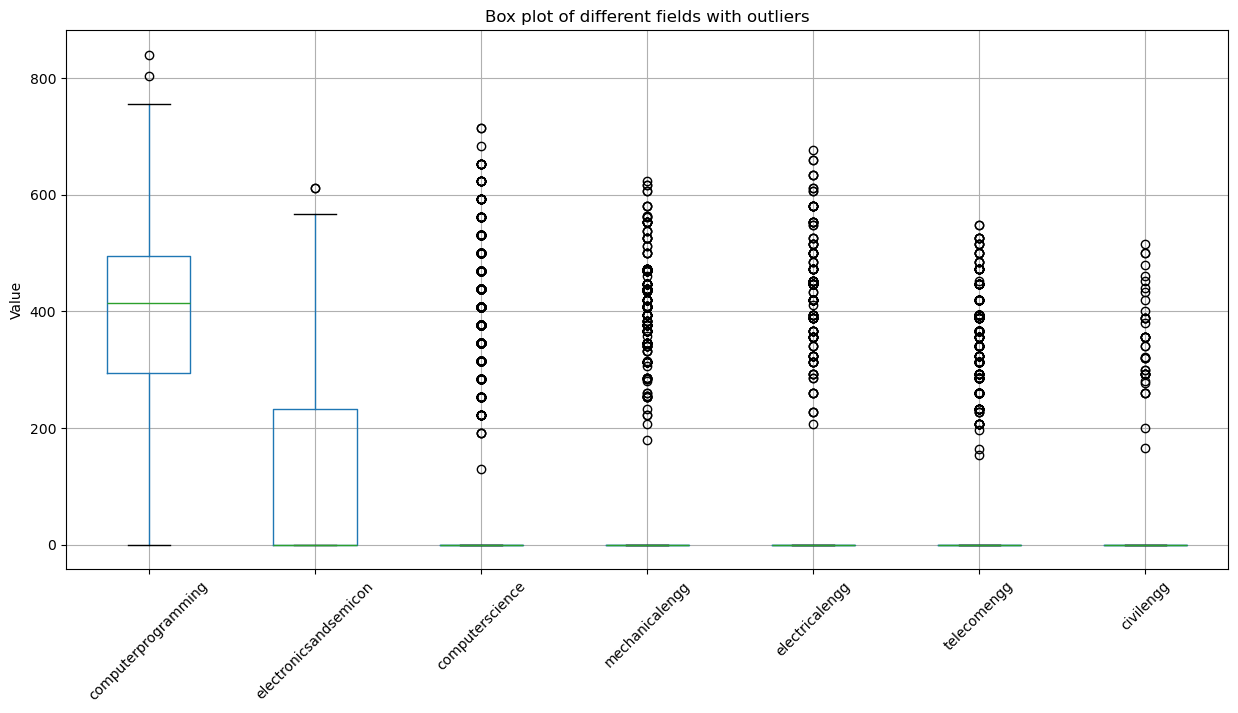

In [41]:
# plot for some numerical columns where amcat test were offered
num_field_columns = ['computerprogramming', 'electronicsandsemicon', 'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg']

plt.figure(figsize=(15, 7))
df[num_field_columns].boxplot()
plt.title('Box plot of different fields with outliers')
plt.ylabel('Value')
plt.xticks (rotation=45)
plt.show()

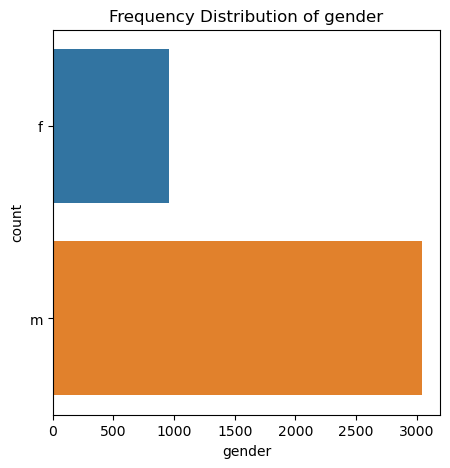

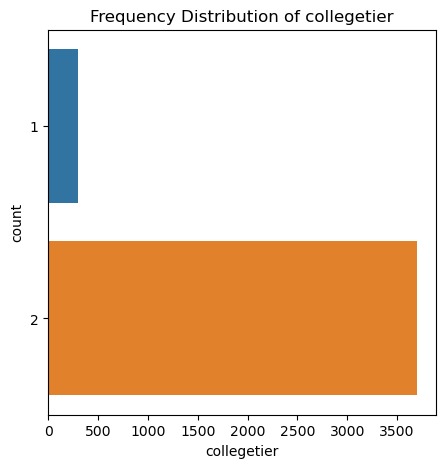

In [42]:
cat_columns=["gender","collegetier"]

for column in cat_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(data=cat_df,y=column)
    plt.title(f"Frequency Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.xticks(rotation=360)
    plt.show()

Observed Points:

1. There were more male candidates who took the test from the study in 2015
2. The number of candidates from college tier 2 exceeds that of tier 1 

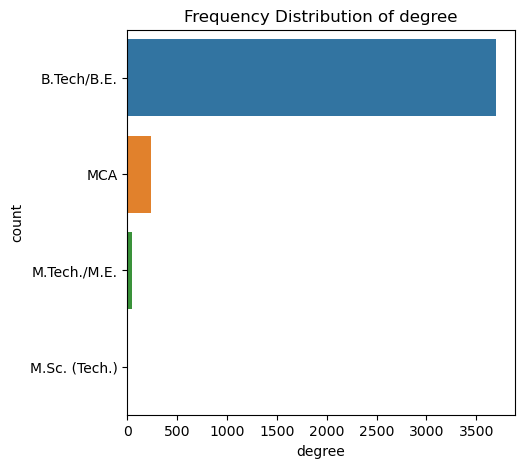

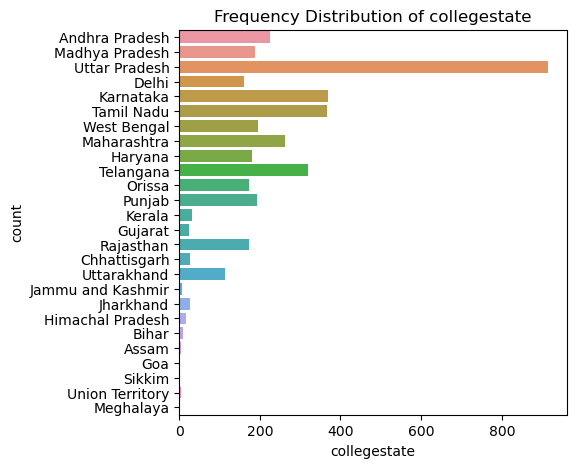

In [44]:
cat_columns=["degree","collegestate"]

for column in cat_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(data=cat_df,y=column)
    plt.title(f"Frequency Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("count")
    plt.xticks(rotation=360)
    plt.show()

1. Very few of the candidates have an MSC (tech) degree most of them have Btech degree
2. Most candidates attended the colleges in UP state then karnataka and tamil nadu .

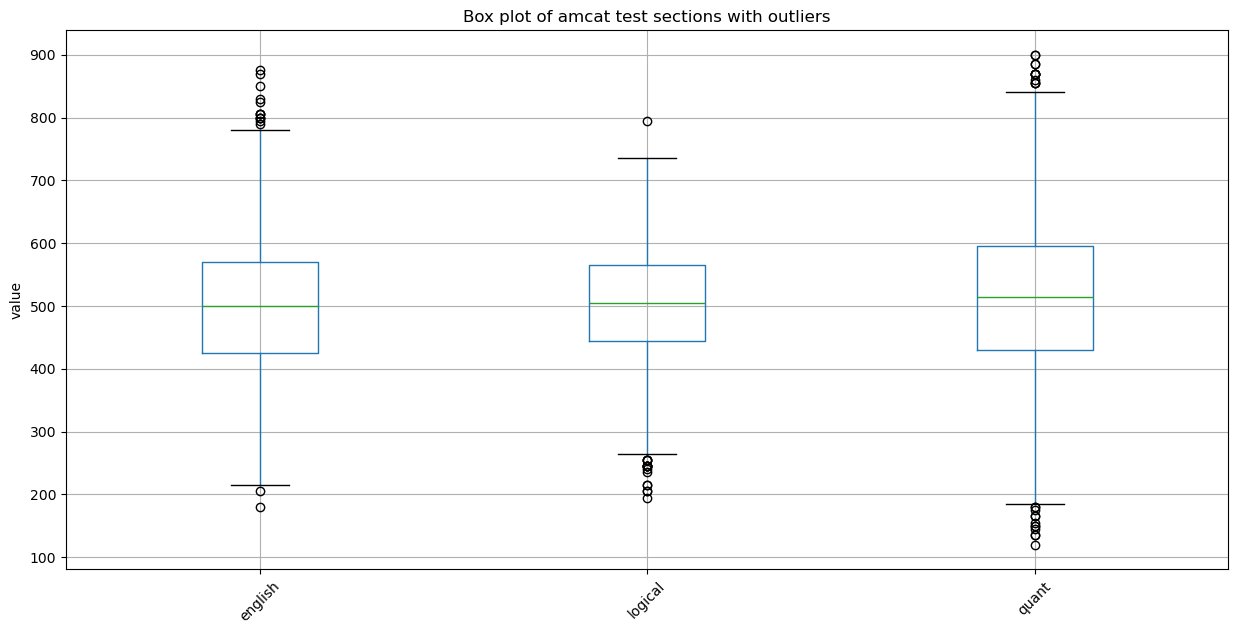

In [46]:
df_tests=["english","logical","quant"]
plt.figure(figsize=(15,7))
df[df_tests].boxplot()
plt.title("Box plot of amcat test sections with outliers")
plt.ylabel("value")
plt.xticks(rotation=45)
plt.show()

This shows differnce of scores for the various amcat sections ,Maximum scores for each ares is 900

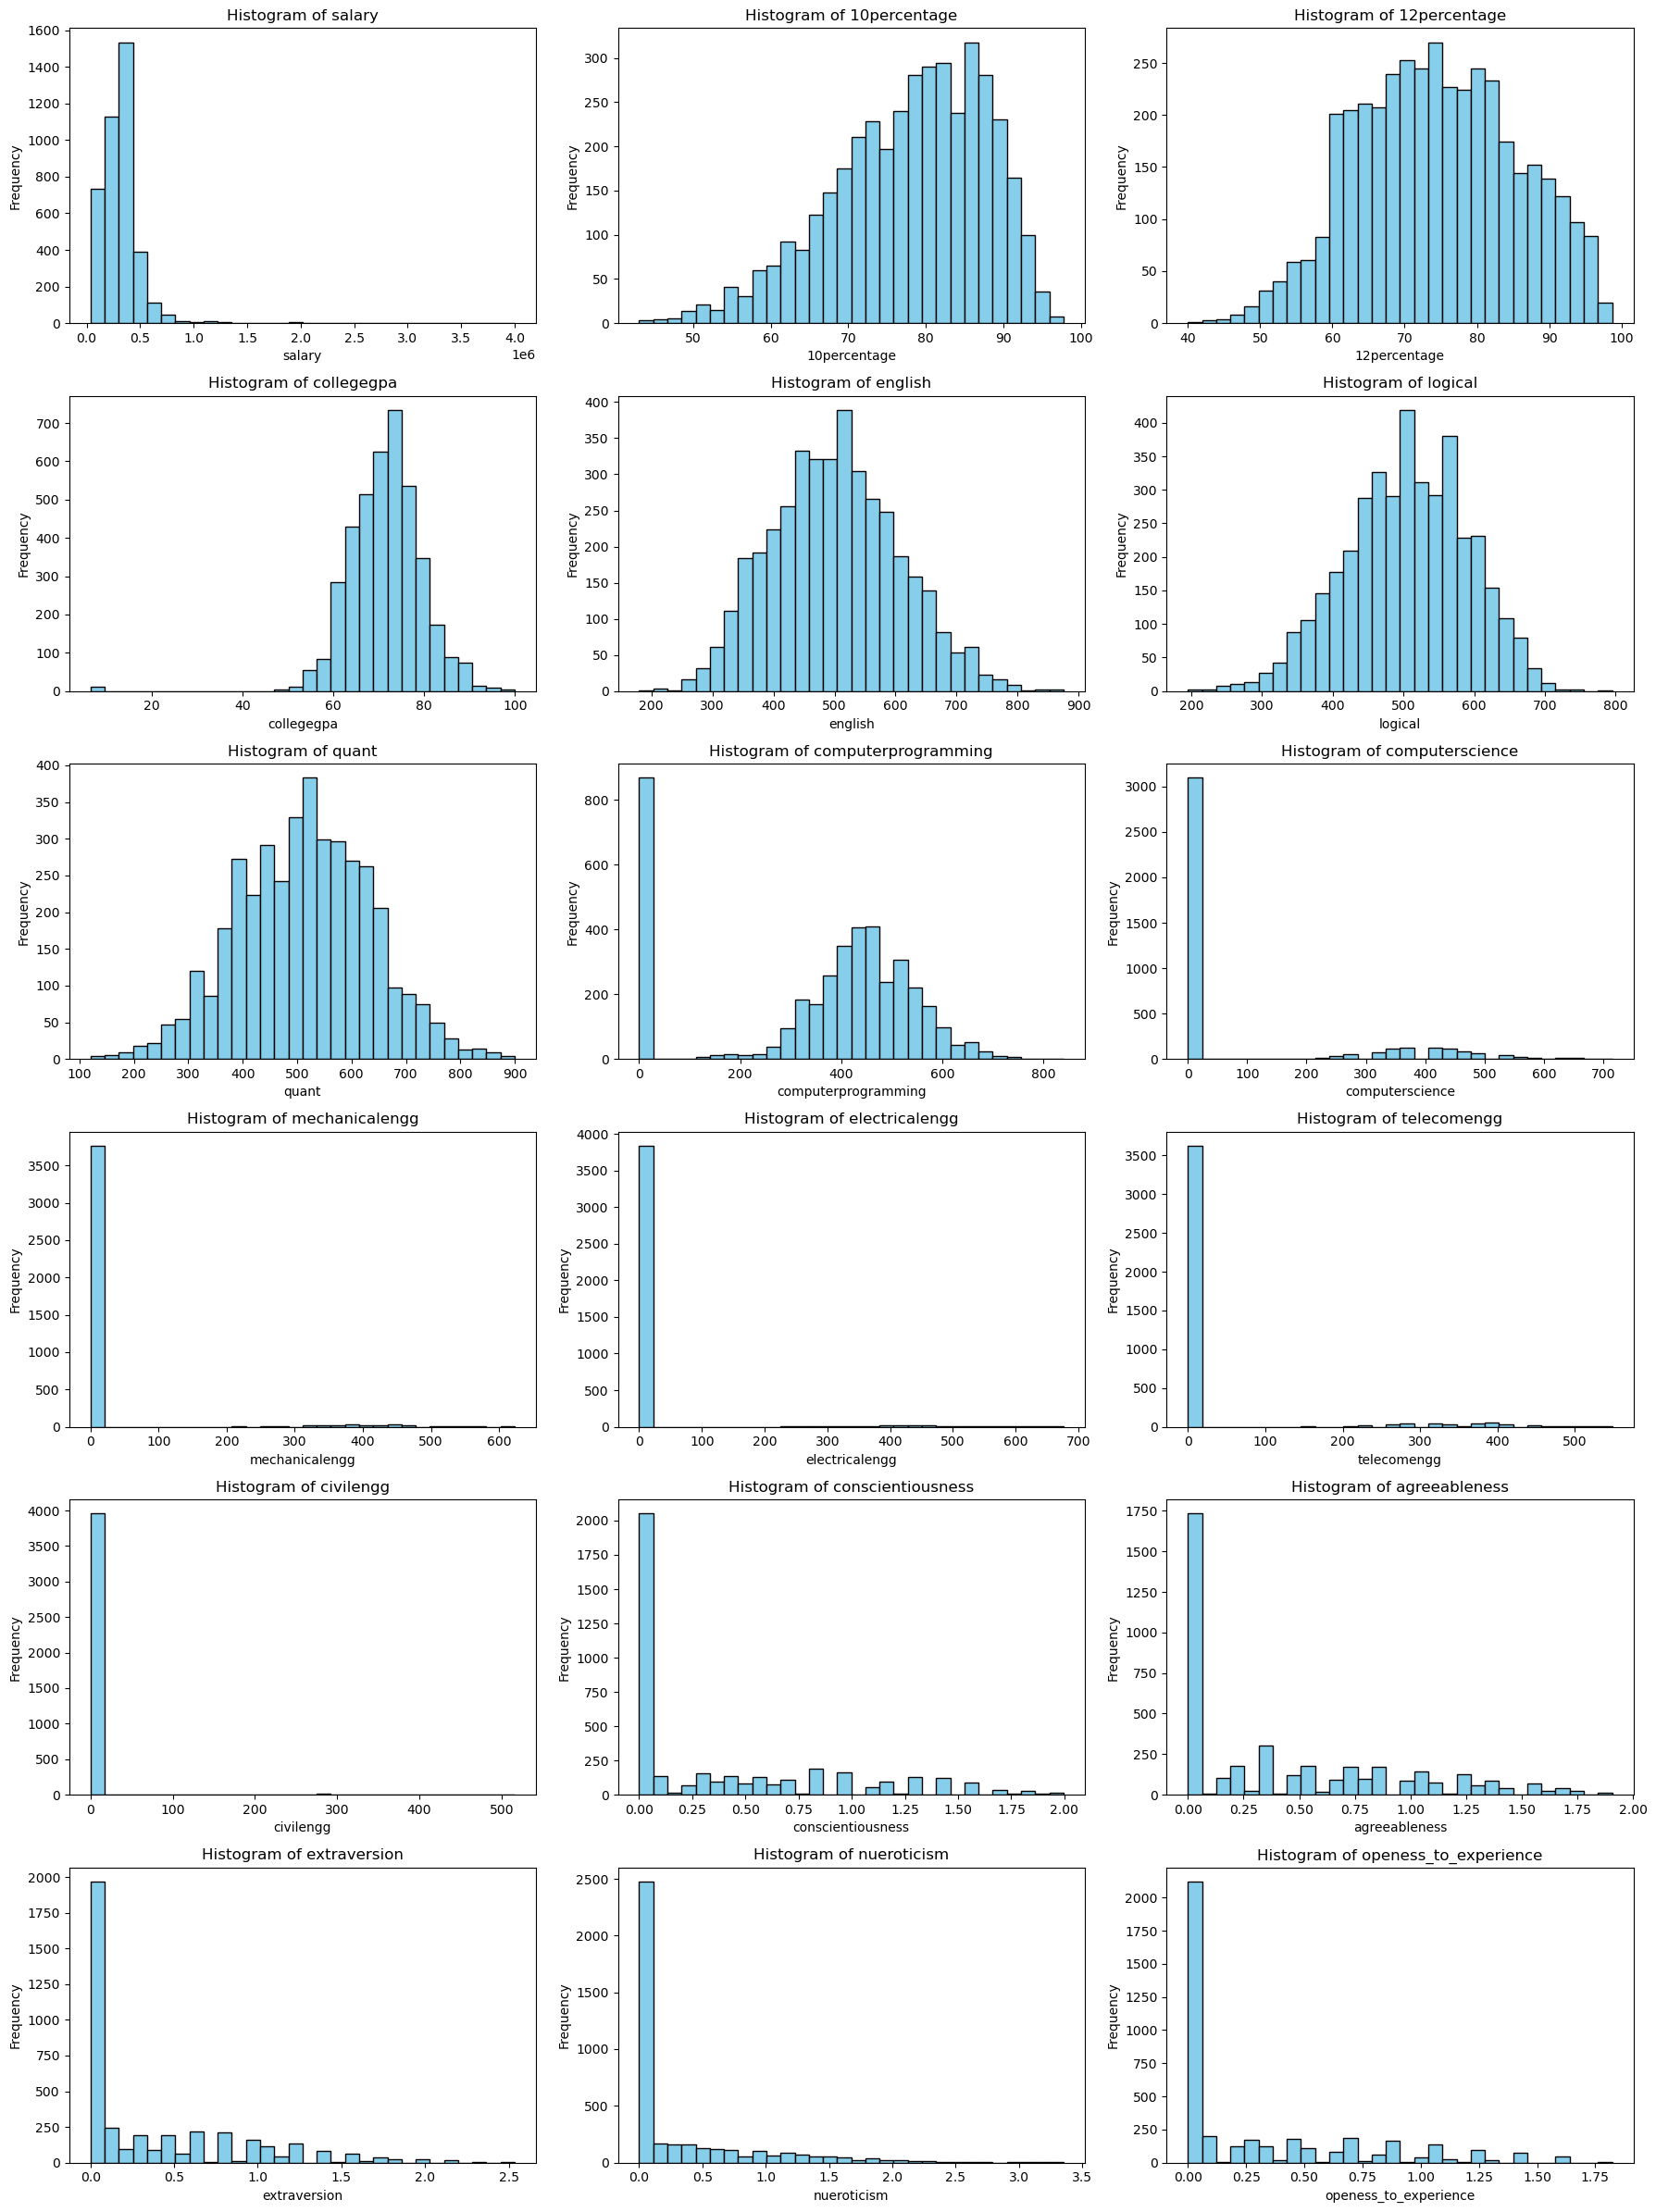

In [48]:
# Select the columns you want to plot
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa','english', 'logical',
'quant', 'computerprogramming', 'computerscience',
'mechanicalengg',
'electricalengg', 'telecomengg', 'civilengg','conscientiousness',
'agreeableness', 'extraversion', 'nueroticism','openess_to_experience']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24)) # 6 rows, 3 columns layout
axes = axes.flatten() # Flatten the 2D array of axes into 1D for easier iteration

# Loop through each column and its respective axis
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column].dropna(), bins=30, color='skyblue',edgecolor='black') # Plot histogram
    axes[i].set_title(f'Histogram of {column}') # Set title for each subplot
    axes[i].set_xlabel(column) # X-axis label
    axes[i].set_ylabel('Frequency') # Y-axis label
    
# Remove any unused subplots (if there are more axes than columns)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout to prevent overlapping
plt.tight_layout()
# Show the plot
plt.show()

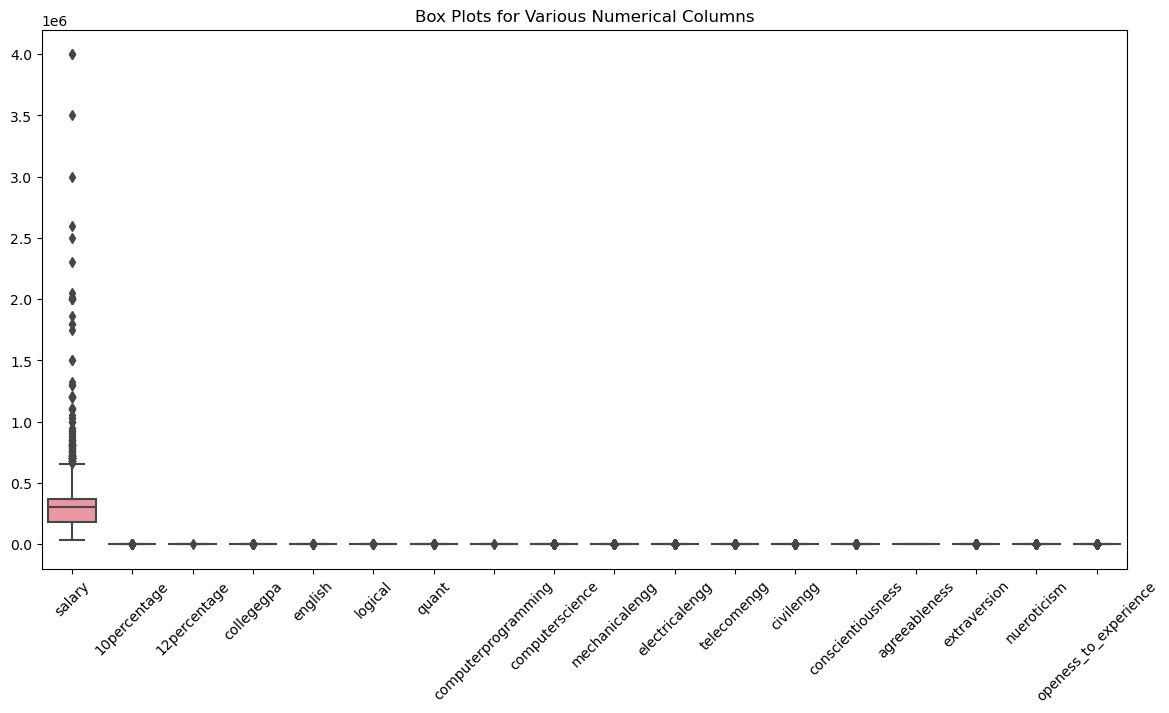

In [49]:
# Correct list of columns to plot (only numerical columns)
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
'english', 'logical', 'quant', 'computerprogramming',
'computerscience', 'mechanicalengg', 'electricalengg',
'telecomengg', 'civilengg', 'conscientiousness',
'agreeableness', 'extraversion', 'nueroticism',
'openess_to_experience']
# Plot the box plot with valid columns
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[columns_to_plot])
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(rotation=45)
plt.show()


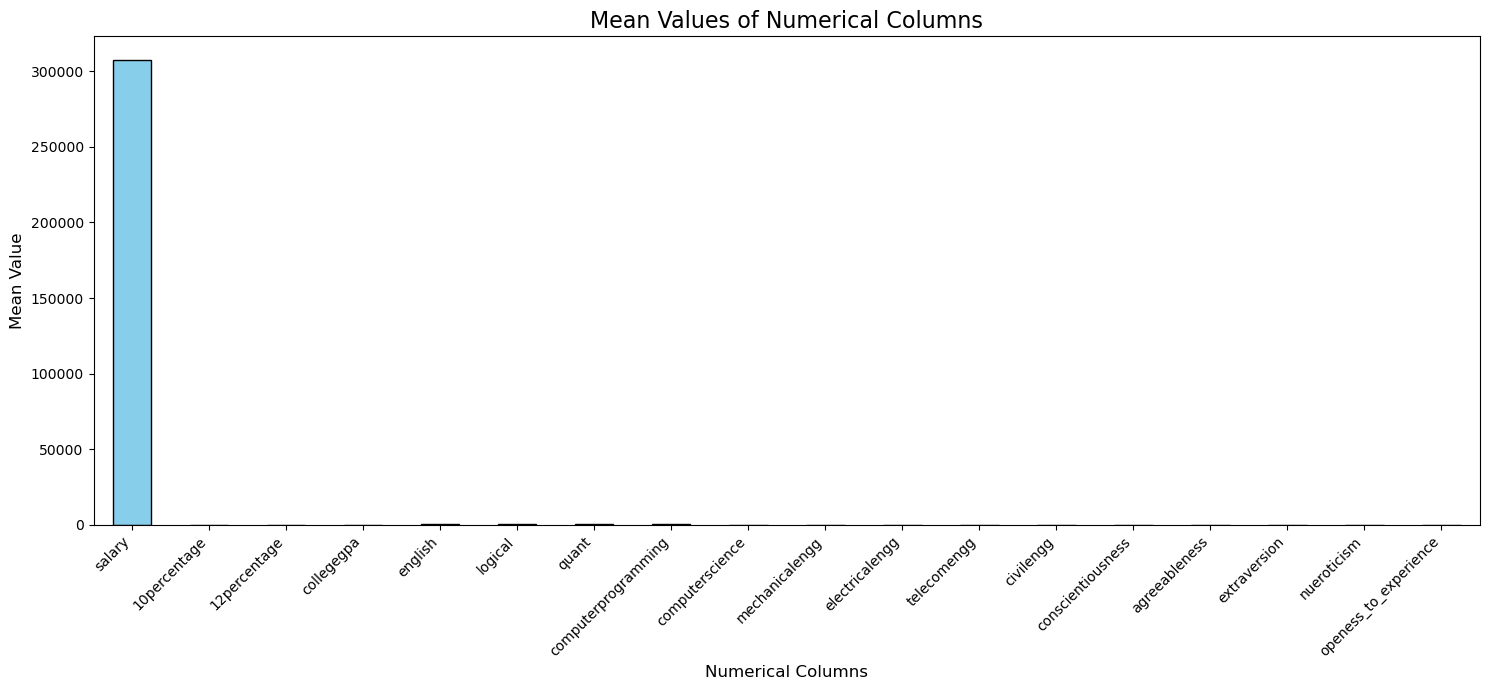

In [50]:
import matplotlib.pyplot as plt
# Select only numerical columns
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa','english', 'logical',
'quant', 'computerprogramming', 'computerscience','mechanicalengg','electricalengg', 'telecomengg', 'civilengg','conscientiousness',
'agreeableness', 'extraversion', 'nueroticism','openess_to_experience']
# Calculate the mean of each numerical column
mean_values = df[columns_to_plot].mean()
# Create the bar plot
plt.figure(figsize=(15, 7)) # Set the figure size
mean_values.plot(kind='bar', color='skyblue', edgecolor='black')
# Customize the plot
plt.title('Mean Values of Numerical Columns', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x labels for better visibility
# Show the plot
plt.tight_layout()
plt.show()


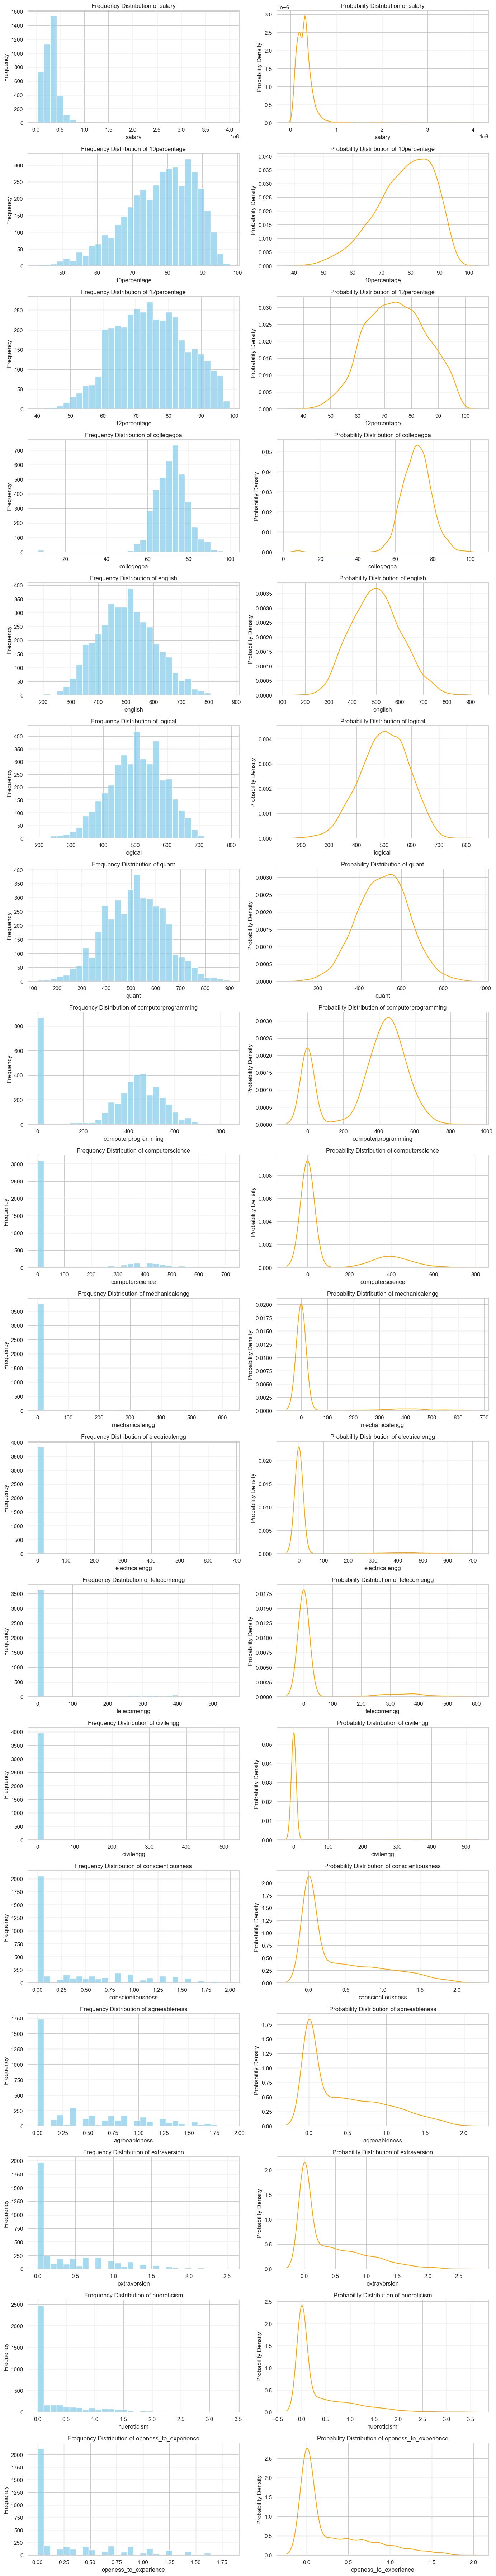

In [51]:
# Set the style of seaborn
sns.set(style="whitegrid")
# Define the columns for plotting
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa','english', 'logical','quant', 'computerprogramming', 'computerscience','mechanicalengg',
'electricalengg', 'telecomengg', 'civilengg','conscientiousness',
'agreeableness', 'extraversion', 'nueroticism','openess_to_experience']
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(14,len(columns_to_plot) * 4))
# Loop through each numerical column to plot
for i, column in enumerate(columns_to_plot):
    # Frequency Distribution
    sns.histplot(df[column], ax=axes[i, 0], bins=30, kde=False, color='skyblue')
    axes[i, 0].set_title(f'Frequency Distribution of {column}', fontsize=12)
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    
    # Probability Distribution (KDE)
    sns.kdeplot(df[column], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Probability Distribution of {column}', fontsize=12)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Probability Density')
    
# Adjust layout
plt.tight_layout()
plt.show()
                

<Axes: xlabel='gender', ylabel='count'>

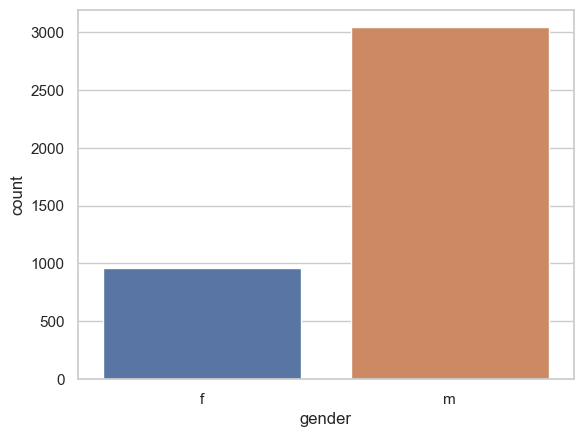

In [52]:
sns.countplot(x=df['gender'])


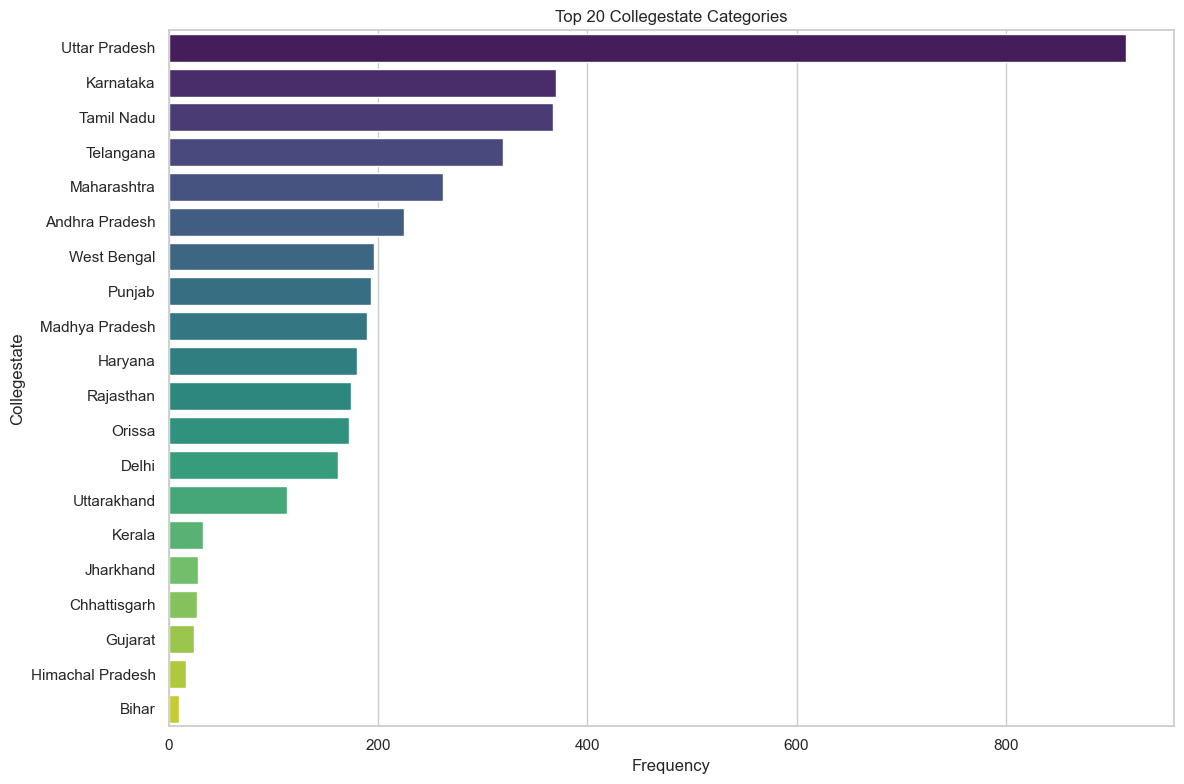

In [53]:
top_collegestates = df['collegestate'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.countplot(y='collegestate', data=df[df['collegestate'].isin(top_collegestates.index)],
palette='viridis', order=top_collegestates.index)
plt.title('Top 20 Collegestate Categories')
plt.xlabel('Frequency')
plt.ylabel('Collegestate')
plt.tight_layout()
plt.show()

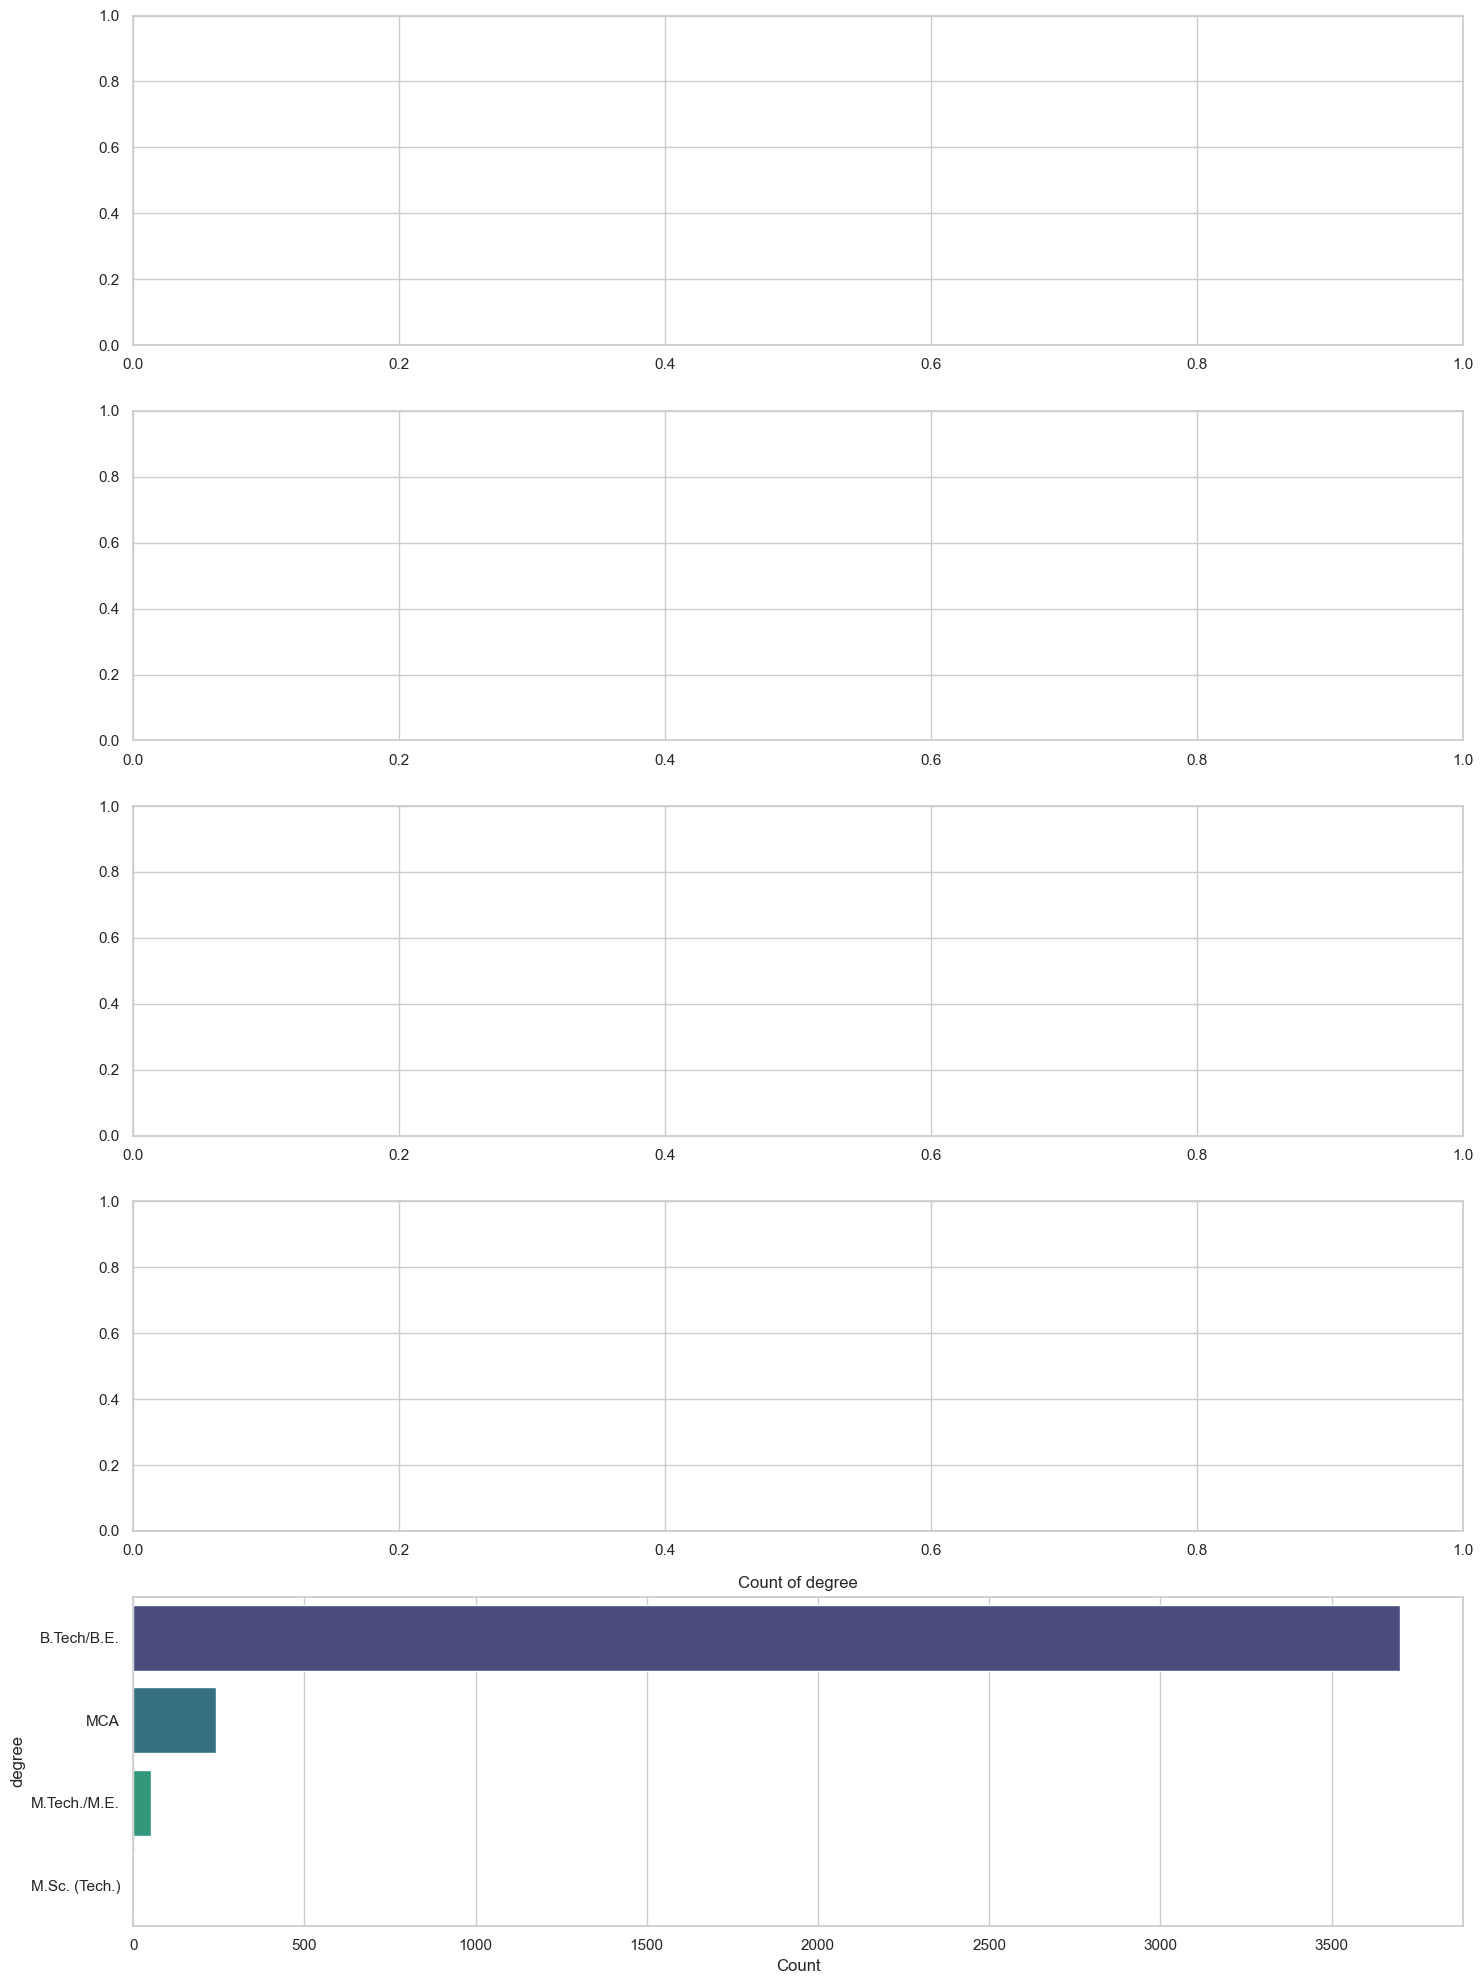

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetics for the plots
sns.set(style="whitegrid")
# List of important categorical columns
important_categorical_columns = ['designation', 'jobcity', 'gender','collegetier', 'degree']
# Create a bar plot for each important categorical column
plt.figure(figsize=(15, 20)) # Adjust the figure size as needed
for i, column in enumerate(important_categorical_columns):
    plt.subplot(len(important_categorical_columns), 1, i + 1) 
# Create a subplot for each column
top_values = df[column].value_counts().nlargest(20) 
# Get top 20 values
sns.barplot(x=top_values.values, y=top_values.index, palette='viridis') 
#Horizontal bar plot
plt.title(f'Count of {column}') # Set the title
plt.xlabel('Count') # Label for x-axis
plt.ylabel(column) # Label for y-axis
plt.tight_layout() # Adjust layout to prevent clipping of tick-labels
plt.show()

Bivariate Analysis

<Axes: xlabel='gender', ylabel='salary'>

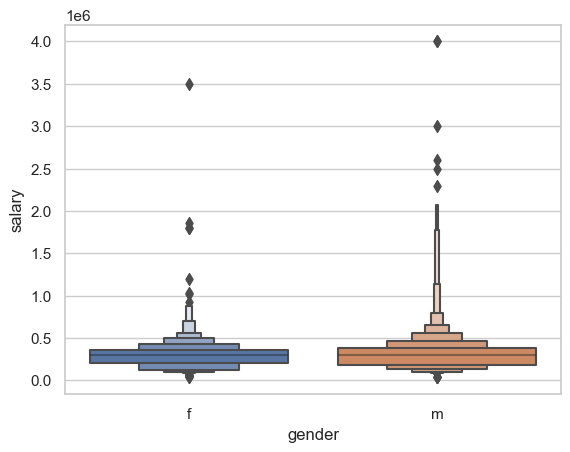

In [56]:
#SALARY VS GENDER
sns.boxenplot(data=df,x="gender",y="salary")

1. The salary distribution analysis reveals a notable disparity between male and female earning,with male having higher salaries.
2. The imbalance in gender representation must be taken into account when interpreting the salary distribution results,as it may influence the overall picture of gender based income differences in study.

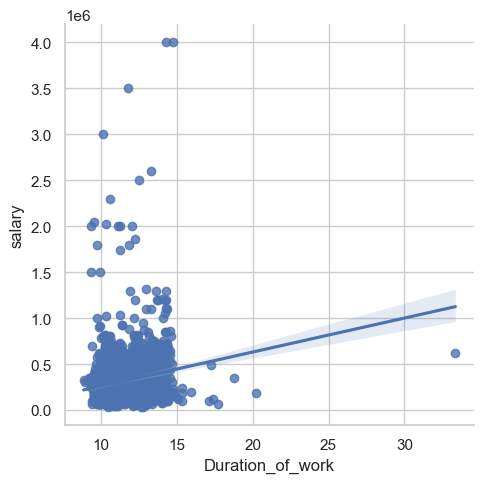

In [58]:
#SALARY VS EXPERIENCE 

df['dol'] = pd.to_datetime(df['dol'], errors='coerce')  # Convert DOL to datetime, coerce errors to NaT
df['doj'] = pd.to_datetime(df['doj'], errors='coerce')  # Convert DOJ to datetime, coerce errors to NaT

from datetime import datetime

# Replace 'present' with today's date
today_date = datetime.today()
df['dol'] = df['dol'].fillna(today_date)  # Replace NaT (from 'present') with today's date

# Calculate the duration of work (in years)
df['Duration_of_work'] = (df['dol'] - df['doj']).dt.days / 365  # Convert days to years

# Plot the duration of work against salary
sns.lmplot(x="Duration_of_work", y="salary", data=df)

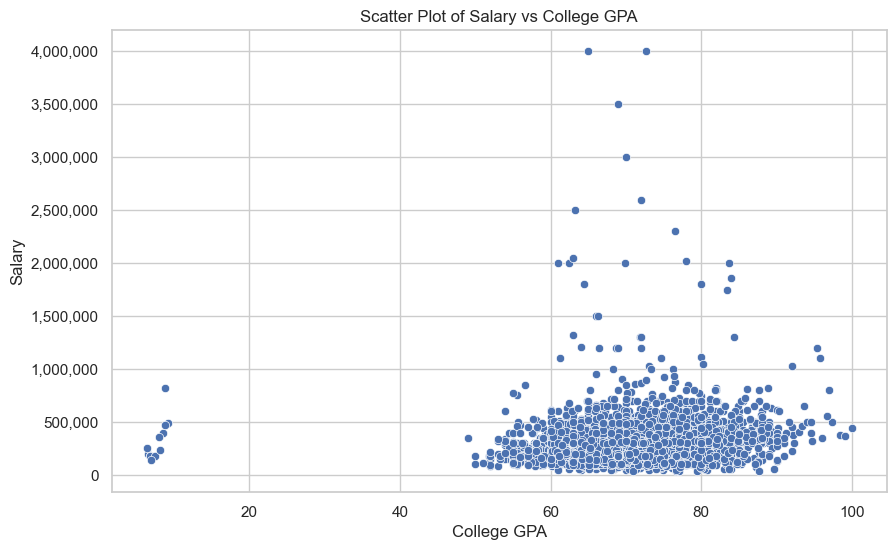

In [59]:
from matplotlib.ticker import FuncFormatter
# Function to format y-axis labels
def currency(x, _):
    return f'{int(x):,}'  # Format as integer with commas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='collegegpa', y='salary')
plt.title('Scatter Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.grid(True)
# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

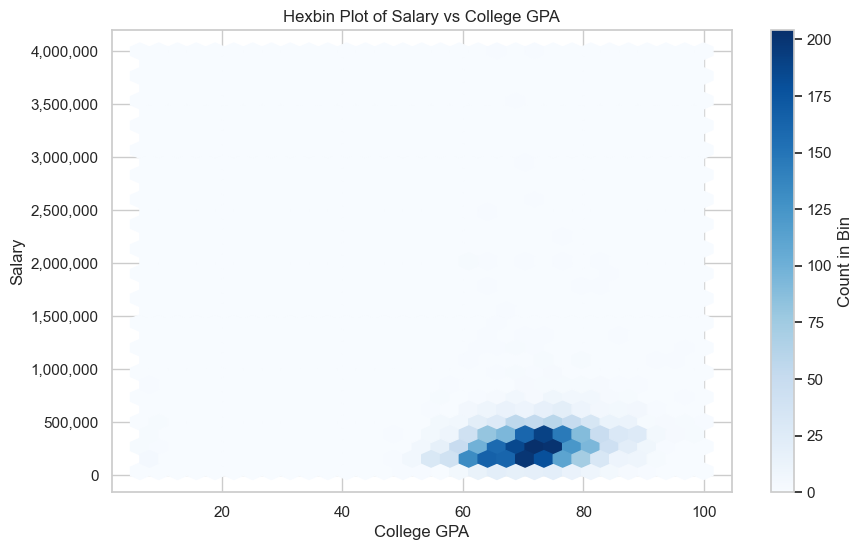

In [60]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['collegegpa'], df['salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

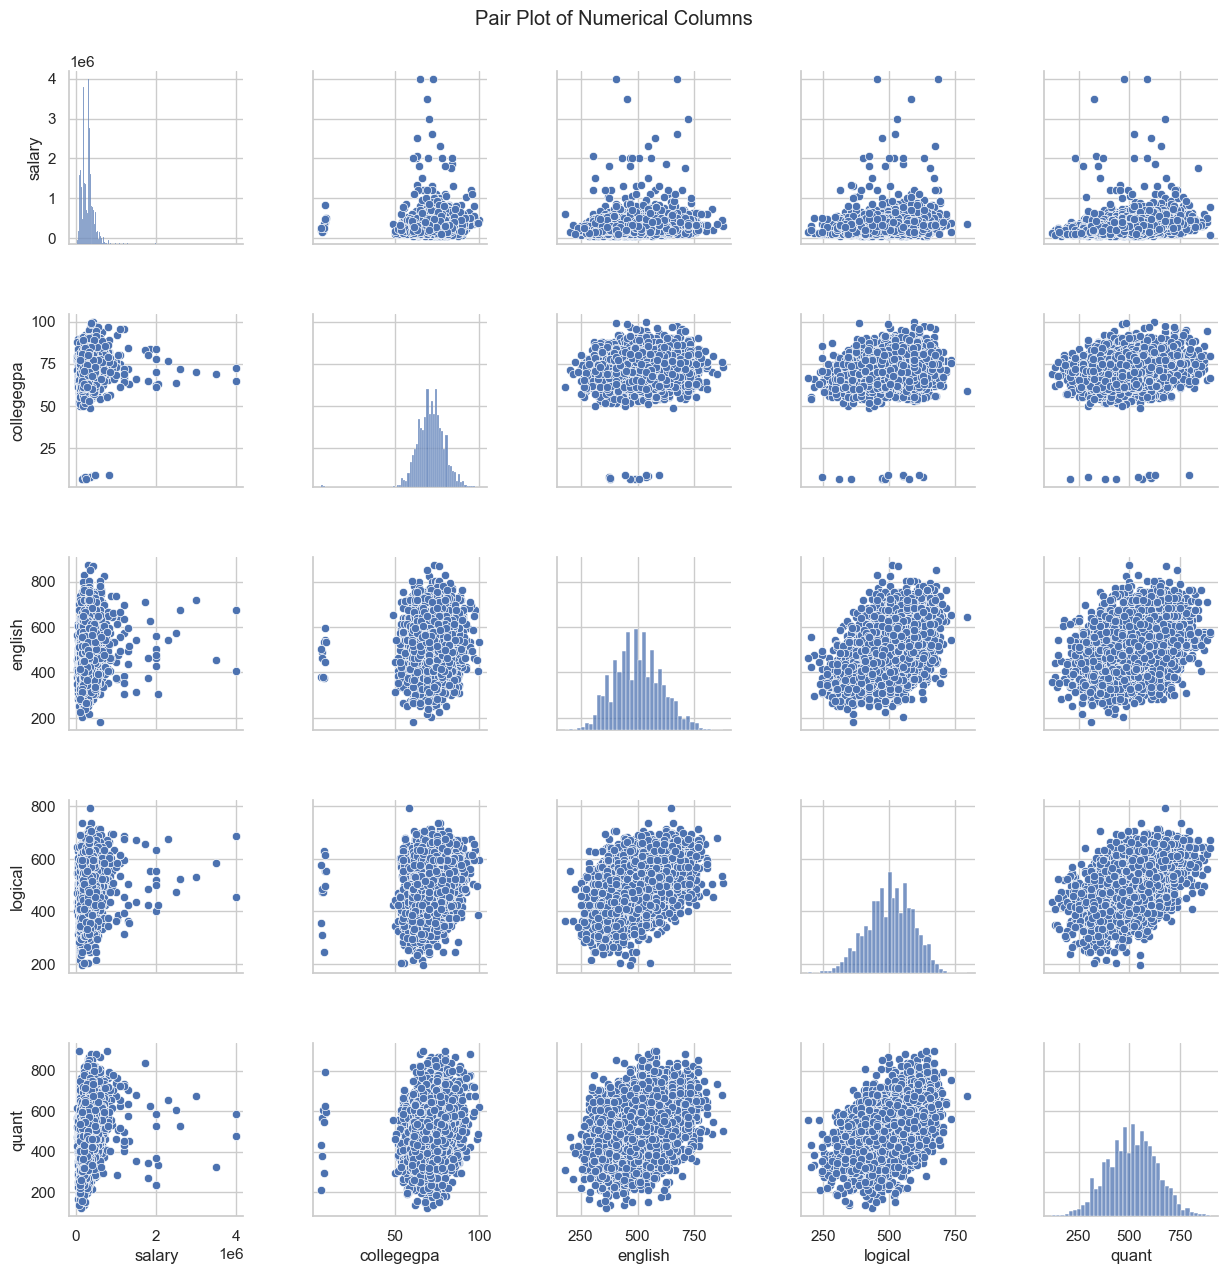

In [61]:
numerical_columns = ['salary', 'collegegpa', 'english', 'logical', 'quant']
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

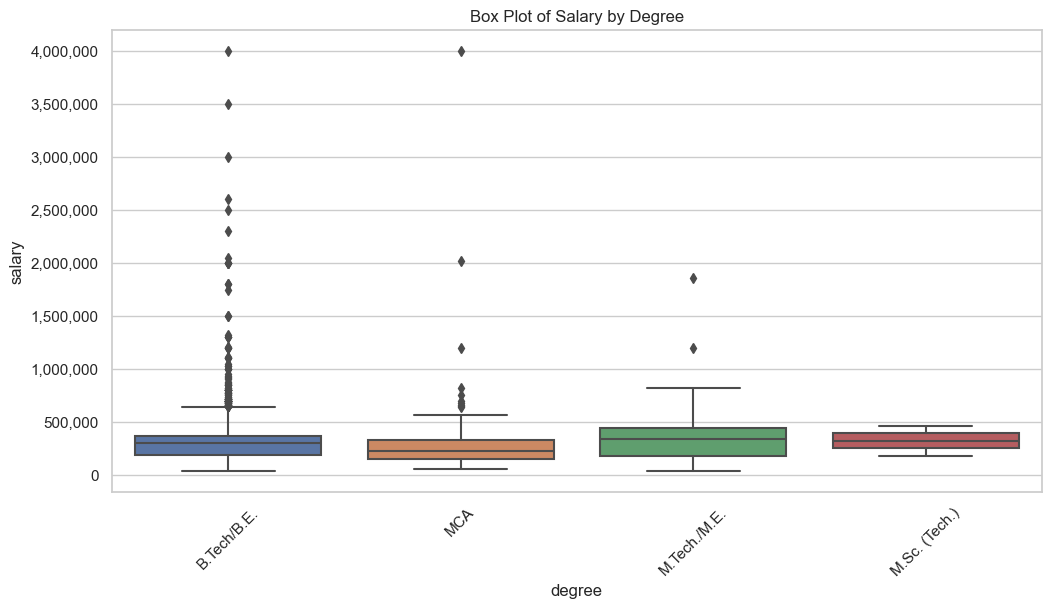

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='degree', y='salary')
plt.title('Box Plot of Salary by Degree')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

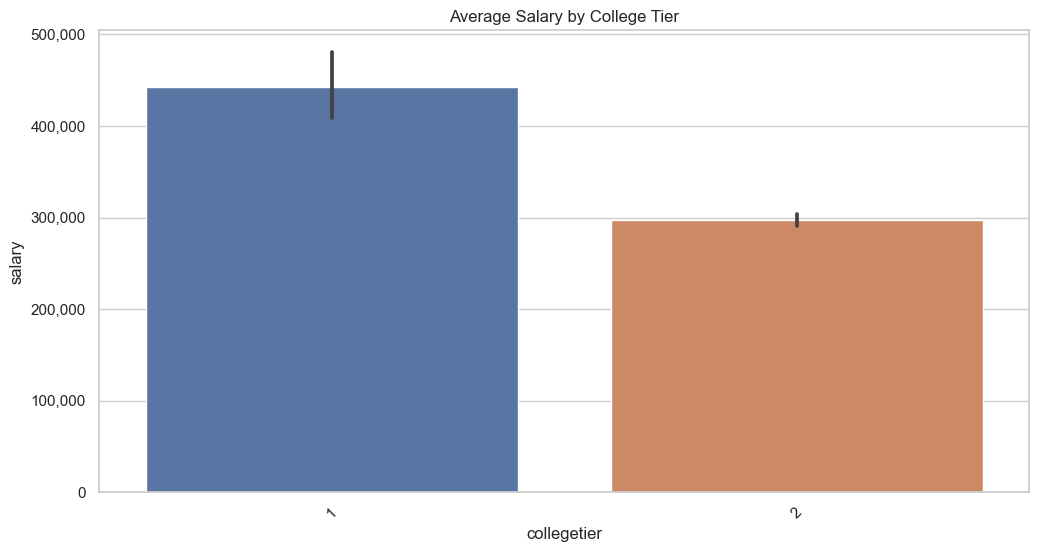

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='collegetier', y='salary', estimator=np.mean)
plt.title('Average Salary by College Tier')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()

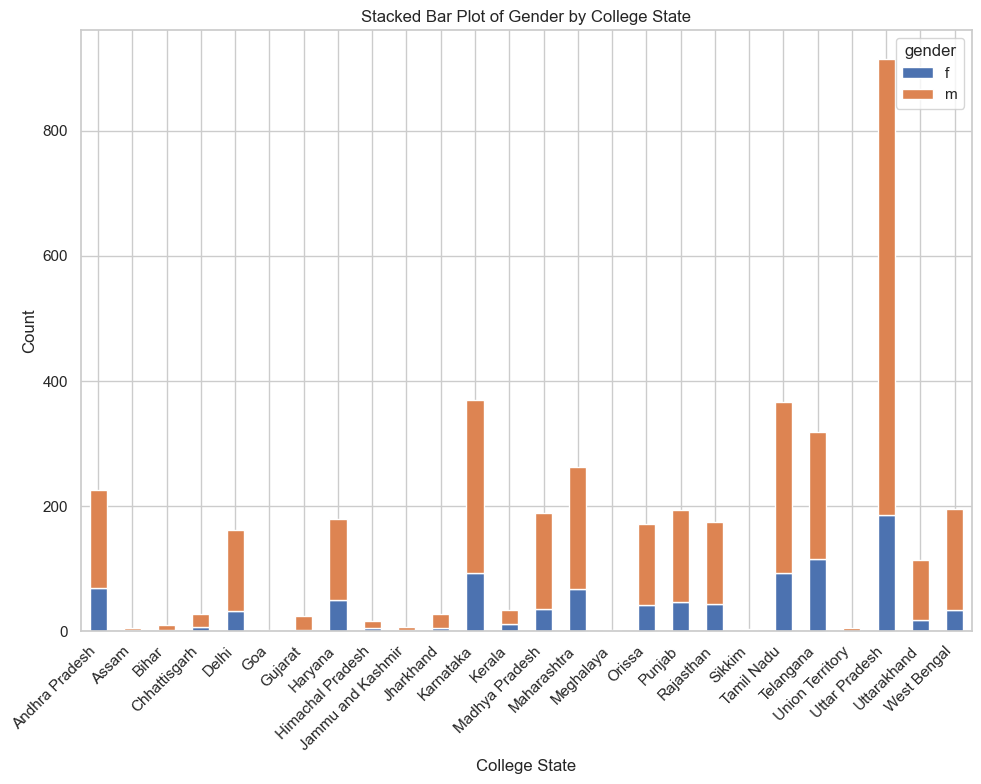

In [64]:
pivot_table = df.pivot_table(index='collegestate', columns='gender',values='salary', aggfunc='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Stacked Bar Plot of Gender by College State')
plt.xlabel('College State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Adjusted alignment to 'right'
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()

RESERACH QUESTION

In [66]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Duration_of_work'],
      dtype='object')

In [67]:
average_salary = df['salary'].mean()
above_3lpa = (df['salary'] > 3).mean() * 100
print(f"Average entry-level salary: {average_salary:.2f} LPA")
print(f"Percentage of salaries above 3 LPA: {above_3lpa:.2f}%")
claim_supported = average_salary > 3
print(f"\nClaim supported: {claim_supported}")
if claim_supported:
    print("The data supports the claim that fresh graduates can earn up to 2.5-3 lakhs per annum.")
else:
    print("The data does not support the claim. Entry-level salaries are higher than stated in the article.")


Average entry-level salary: 307699.85 LPA
Percentage of salaries above 3 LPA: 100.00%

Claim supported: True
The data supports the claim that fresh graduates can earn up to 2.5-3 lakhs per annum.


In [145]:
grouped=df.groupby(["specialization","gender"]).size().unstack(fill_value=0)
grouped

gender,f,m
specialization,,
Aeronautical Engg,1,2
Automobiles,0,5
Biomedical Engineering,11,6
CSE,420,1181
Chemical Engg,1,9
Civil Engg,6,24
ECE,243,766
EEE,71,299
IT,181,507


<Axes: xlabel='specialization'>

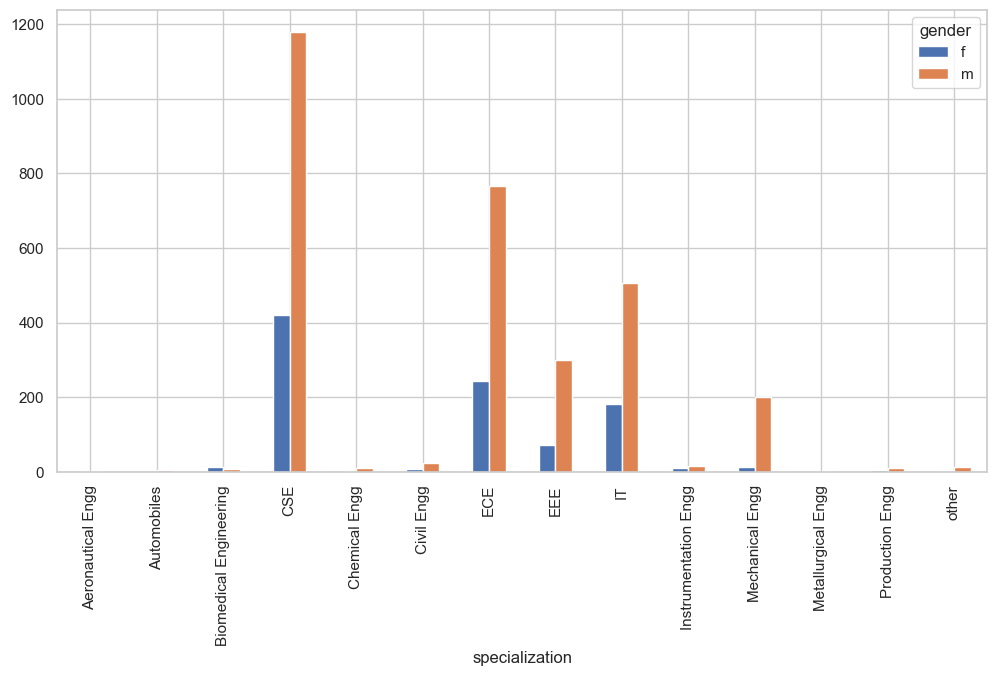

In [147]:
grouped.plot(kind="bar",figsize=(12,6))

In [70]:
test_scores = ['english', 'logical', 'quant', 'computerprogramming', 'electronicsandsemicon', 
               'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg']

df_analysis = df[test_scores].copy()



df_analysis['avg_df_score'] = df_analysis[['english', 'logical', 'quant']].mean(axis=1)
df_analysis['avg_df_percent'] = (df_analysis['avg_df_score'] / 900) * 100  # Adjust divisor based on max score

df_analysis['avg_df_percent'] = df_analysis['avg_df_score']


edu_columns = ['10percentage', '12percentage', 'collegegpa']
df_analysis[edu_columns] = df[edu_columns]

corr_columns = ['10percentage', '12percentage', 'collegegpa', 'avg_df_percent']
df_analysis[corr_columns] = df_analysis[corr_columns].apply(pd.to_numeric, errors='coerce')
df_analysis = df_analysis.dropna(subset=corr_columns)

correlation_matrix = df_analysis[corr_columns].corr()







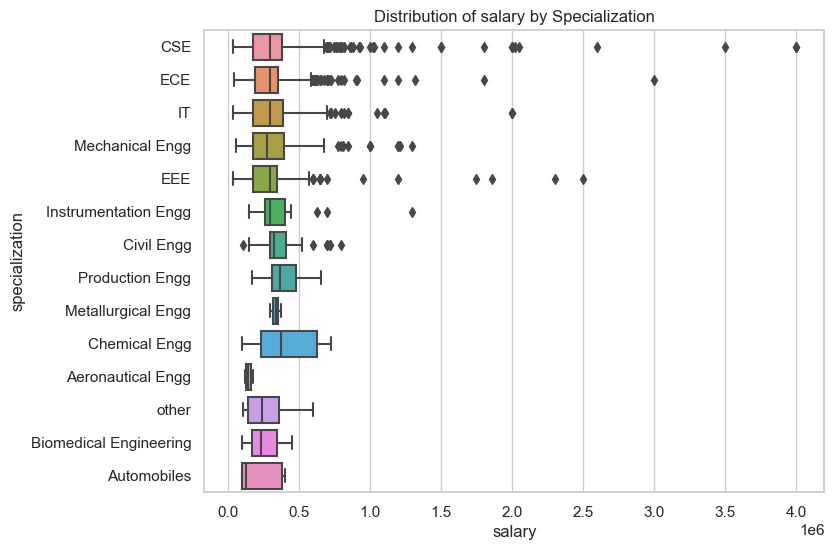

In [71]:
def clean_specialization(row):
    specialization_map = {
        'CSE': ['computer'],
        'ECE': ['communication'],
        'IT': ['information'],
        'EEE': ['electrical', 'electro', 'telecomm', 'power', 'embedded'],
        'Mechanical Engg': ['combus', 'mech'],
        'Chemical Engg': ['polymer', 'chem'],
        'Civil Engg': ['civil', 'ceramic'],
        'Metallurgical Engg': ['metallurgical'],
        'Instrumentation Engg': ['instrument'],
        'Production Engg': ['industrial'],
        'Biomedical Engineering': ['bio'],
        'Automobiles': ['auto'],
        'Aeronautical Engg': ['aero']
    }
    row = row.lower()
    for category, keywords in specialization_map.items():
        if any(keyword in row for keyword in keywords):
            return category
    return row


df['specialization'] = df['specialization'].apply(clean_specialization)



plt.figure(figsize=(8, 6))
sns.boxplot(y='specialization', x='salary', data=df)
plt.title("Distribution of salary by Specialization")
plt.show()




1. Chemical Engineering has a wider spread of salary range
2. Production and Chemical Engineers have the highest median salary amongest the different specializations.
3. Aeronautical engineering and metallurgical engineering had the least spread of salary ranges 

In [73]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Duration_of_work'],
      dtype='object')

In [74]:
# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['specialization'])
# Display the contingency table
print("Contingency Table:")
print(contingency_table)
# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# Create a results DataFrame with reset index
results = pd.DataFrame({
'Metric': ['Chi-Squared Statistic', 'P-value', 'Degrees of Freedom','Conclusion'],
'Value': [
chi2_stat,
p_value,
dof,
"Reject the null hypothesis" if p_value < 0.05 else "Fail to reject the null hypothesis"
]
})
# Reset the index of the results DataFrame
results.reset_index(drop=True, inplace=True)
# Display the results
print("\nChi-Square Test Results:")
print(results)


Contingency Table:
specialization  Aeronautical Engg  Automobiles  Biomedical Engineering   CSE  \
gender                                                                         
f                               1            0                      11   420   
m                               2            5                       6  1181   

specialization  Chemical Engg  Civil Engg  ECE  EEE   IT  \
gender                                                     
f                           1           6  243   71  181   
m                           9          24  766  299  507   

specialization  Instrumentation Engg  Mechanical Engg  Metallurgical Engg  \
gender                                                                      
f                                  9               11                   0   
m                                 16              201                   2   

specialization  Production Engg  other  
gender                                  
f                           